# EXPLORATORY DATA ANALYSIS

## Titanic Dataset

In [82]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#load the data
data = pd.read_csv('/home/christine/Desktop/Titanic EDA/titanic_train.csv')

In [84]:
#read the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
#check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
#calculate the percentage of the missing data
data['Cabin'].isnull().count().sum()/data['Cabin'].count().sum()*100

436.7647058823529

### Inference
 Cabin Column has the highest number of missing values followed by the age age column and embarked column have athe least number of missing values

<AxesSubplot:xlabel='Survived', ylabel='count'>

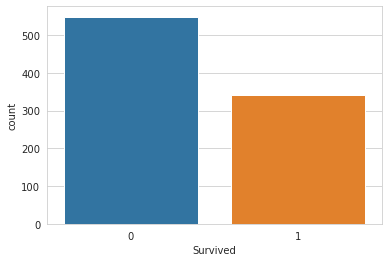

In [87]:
#visualize the Survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

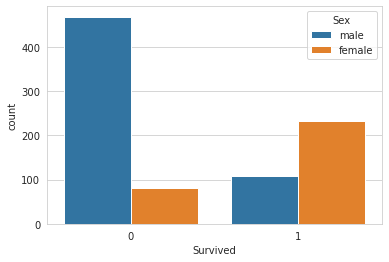

In [88]:
#categorize suvivors according to their sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

### 
There was a higher number of female survivors than male survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

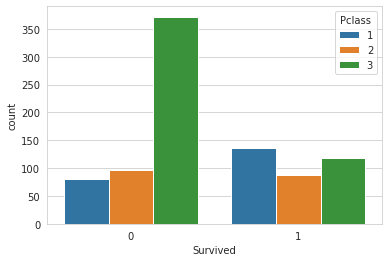

In [89]:
#lets see how the passenger class affected the survival rate
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

###
 There was a high survival rate in first class compared to the second and third classes

/home/christine/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

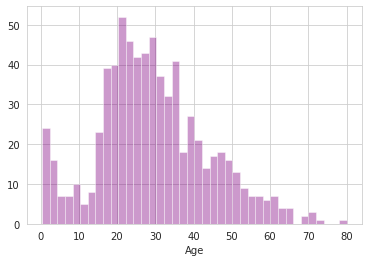

In [90]:
#lets check the age distribution of the passengers on board
sns.distplot(data['Age'].dropna(),kde=False,color='purple',bins=40)

###
A large percentage of the passenger were between the age of 18 and 35 years old

<AxesSubplot:xlabel='SibSp', ylabel='count'>

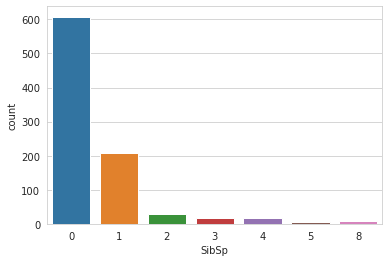

In [91]:
#we check how many people brought along their siblings an spouses
sns.countplot(x='SibSp',data=data)

###
Almost all the people on board did not have siblings or spouses accompanying them

<AxesSubplot:>

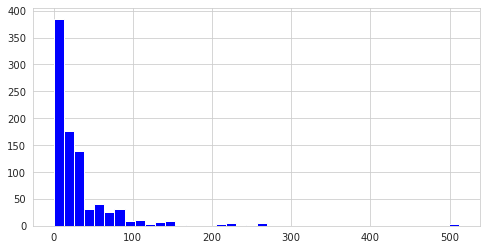

In [92]:
data['Fare'].hist(color='blue',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

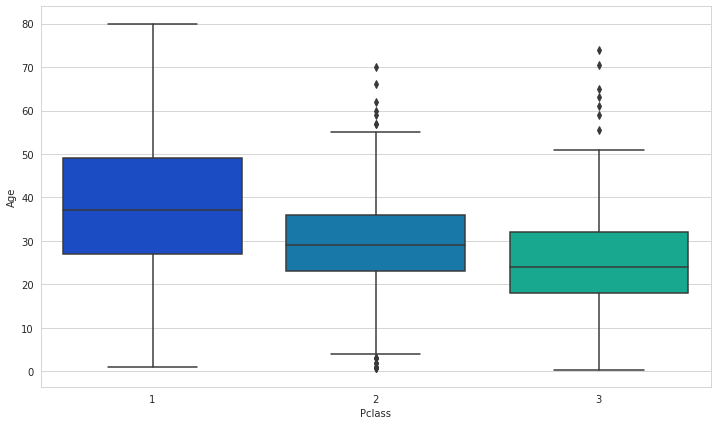

In [93]:
#deal with the missing values
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

###
Passengers in the higher classes tend to be older. We will use the average age to fill in the missing values

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age




In [95]:
#apply the function
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

In [96]:
#lets check the missing values again
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
#drop the cabin column
data.drop('Cabin',axis=1,inplace=True)

In [98]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [99]:
#one hot encoding on the categorical data
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [100]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [101]:
#drop the unnecessary columns
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [102]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [104]:
data = pd.concat([data,sex,embark],axis=1)

In [105]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [106]:
data = pd.concat([data,sex,embark],axis=1)

In [107]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,1,0,1
